The following code will help us to find a way to classify skin cancer using deep learning methods. The HAM10000 dataset was utilized in this study. It consist in 10 015 dermatoscopic images (All the information regarding the database is located in the 'archive' folder).

In [719]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

These lines of code load data from a CSV file (hmnist_28_28_RGB.csv) into a DataFrame and then display the last 5 rows of that DataFrame (just to make sure that data has been loaded correctly), allowing to examine the data easily.
The hmnist_28_28_RGB CSV file was used because it contained each image with its corresponding label, making it easier to manipulate the data starting from this file. However, the images will still be modified later by increasing the resolution for better model learning.


In [720]:
path = "../archive/hmnist_28_28_RGB.csv"
df=pd.read_csv(path)
df.tail(5)

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
10010        184        166        182        188  ...        208        185   
10011        121        104        103        132  ...         96         79   
10012        175        156        160        184  ...        204        181   
10013        167        127        146        169  ...        185        162   
10014        181        150        133        178  ...        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  label  
10010        189      0  
10011          1      0  
10012        145      0  
10013        172      0  
10014        126      6  

[5 rows x 2353 columns]

These lines of code perform data shuffling, data splitting into training and test sets.

In [721]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

num_rows = df.shape[0]
print(num_rows)

print(len(train_set))
print(len(test_set))
df.label.unique()


10015
8012
2003


array([4, 6, 2, 1, 0, 3, 5], dtype=int64)

In this study, there are seven different classes. Therefore, each label in the dataframe is associated with a name.

In [722]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

These lines of code separate the features (input variables) and labels (target variable) from both the training and test sets, preparing the data for machine learning model training and evaluation.

In [723]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])

y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train) 



These lines of code check if a CUDA-enabled GPU is available and assigns the appropriate device accordingly. 

In [724]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)



cpu


Data imbalance in skin disease datasets are common problems in the skin cancer classification tasks. 
These lines of code set up the necessary libraries and tools for handling imabalanced datasets and apply the SMOTE technique to the training data to mitigate class imbalance issues.

In [725]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import random

smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)



These lines of code represent the class imbalance in the training set before using the SMOTE method.

Classe 0: 271 images
Classe 1: 404 images
Classe 2: 889 images
Classe 3: 89 images
Classe 4: 5360 images
Classe 5: 107 images
Classe 6: 892 images


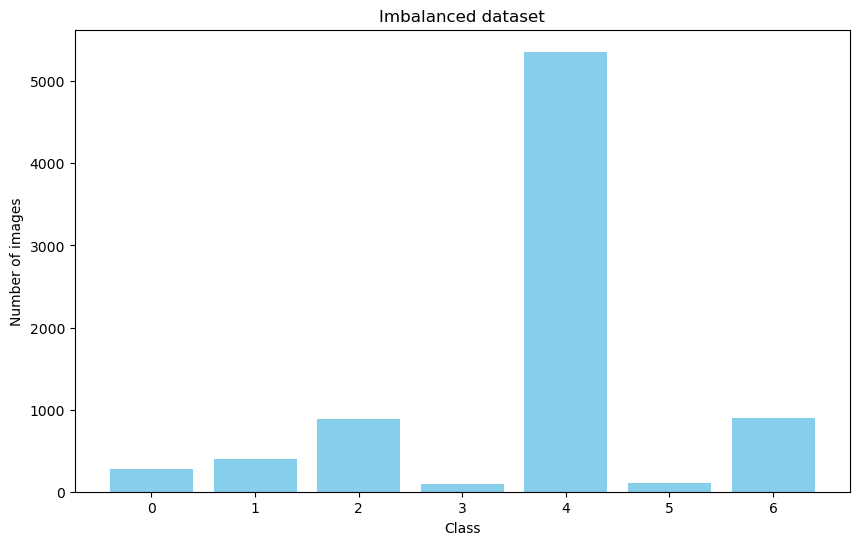

In [769]:

unique_classes1, counts = np.unique(y_train, return_counts=True)

for classe, count in zip(unique_classes1, counts):
    print(f"Classe {classe}: {count} images")

plt.figure(figsize=(10, 6))
plt.bar(unique_classes1, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Imbalanced dataset')
plt.xticks(unique_classes1)
plt.show()


These lines of code represent the class rebalancing using the SMOTE method.

Classe 0: 5360 images
Classe 1: 5360 images
Classe 2: 5360 images
Classe 3: 5360 images
Classe 4: 5360 images
Classe 5: 5360 images
Classe 6: 5360 images


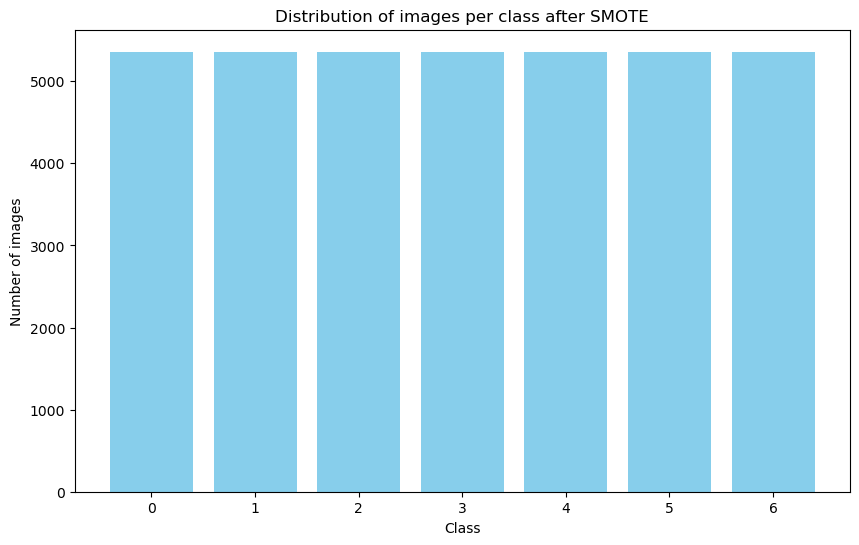

In [764]:

unique_classes, counts = np.unique(y_train_resampled, return_counts=True)

for classe, count in zip(unique_classes, counts):
    print(f"Classe {classe}: {count} images")


plt.figure(figsize=(10, 6))
plt.bar(unique_classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Distribution of images per class after SMOTE')
plt.xticks(unique_classes)
plt.show()


The purpose of these lines of code is to visualize random images from the training data. This can be helpful for inspecting the data and undertsanding its characteristics. These images are of size 28x28 because the hmnist_28_28_RGB.csv file was used to load the data. Later on, the resolution will be increased to achieve higher accuracy when the model learns.

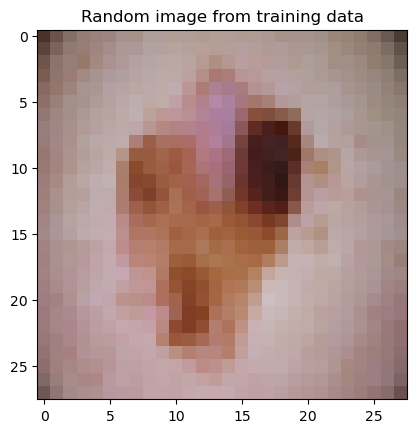

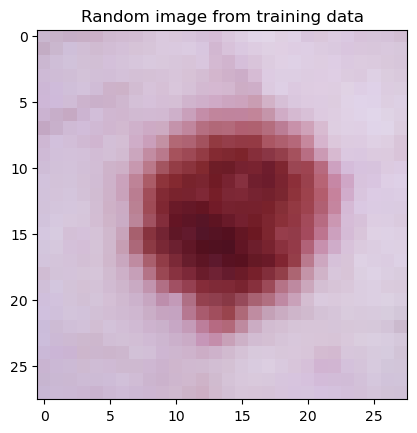

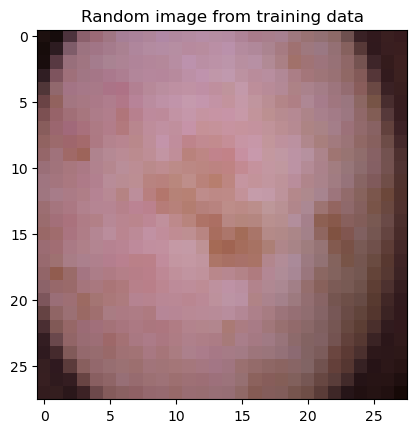

In [729]:
import matplotlib.pyplot as plt
import random


num=random.randint(0,8000)
x_train_resampled=np.array(x_train_resampled, dtype=np.uint8).reshape(-1,28,28,3)
plt.imshow(x_train_resampled[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train_resampled[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train_resampled[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

These lines of code simply increase the resolution (to 50x50) of the images for higher accuracy.

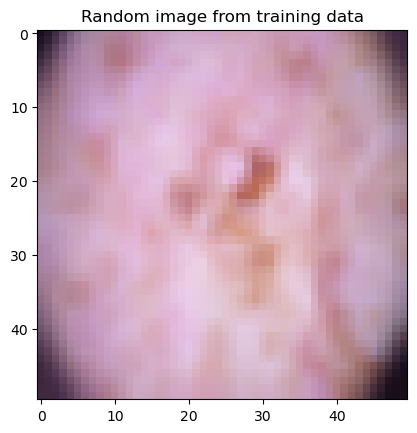

In [752]:
import cv2
x_train_resampled = np.array([cv2.resize(img, (50,50)) for img in x_train_resampled], dtype=np.uint8)
plt.imshow(x_train_resampled[num].reshape(50,50,3))
plt.title("Random image from training data")
plt.show()

The same process (increase the resolution of the images) has been done to the testing set.

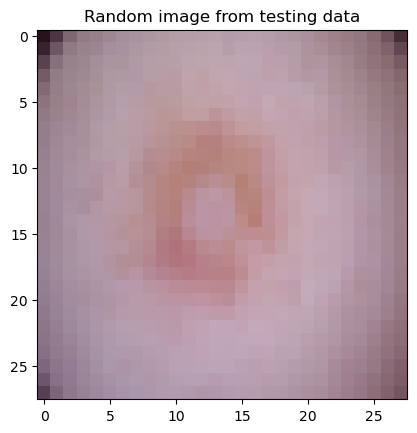

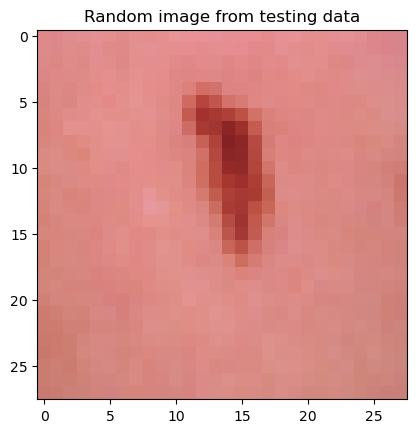

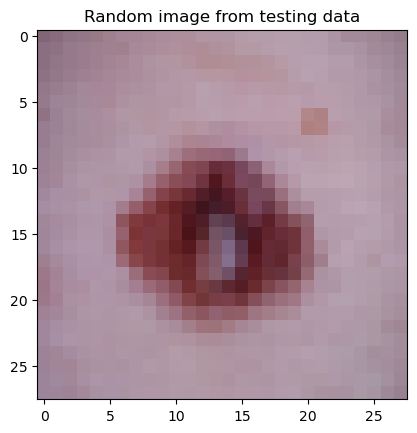

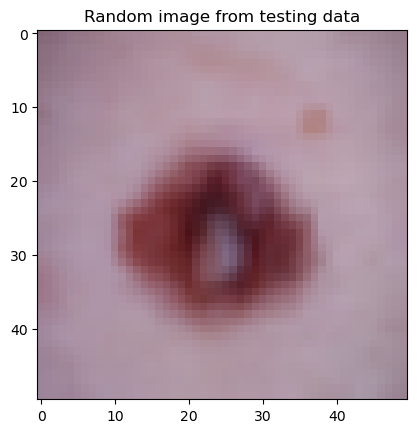

In [785]:
import matplotlib.pyplot as plt
import random
import cv2


num=random.randint(0,2000)
x_test_resampled=np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)
plt.imshow(x_test_resampled[num].reshape(28,28,3))
plt.title("Random image from testing data")
plt.show()

num=random.randint(0,2000)
plt.imshow(x_test_resampled[num].reshape(28,28,3))
plt.title("Random image from testing data")
plt.show()

num=random.randint(0,2000)
plt.imshow(x_test_resampled[num].reshape(28,28,3))
plt.title("Random image from testing data")
plt.show()


x_test_resampled = np.array([cv2.resize(img, (50,50)) for img in x_test_resampled], dtype=np.uint8)
plt.imshow(x_test_resampled[num].reshape(50,50,3))
plt.title("Random image from testing data")
plt.show()


These lines of code allow creating the convolutional neural network model using the Keras API of TensorFlow. 

Convolutional layers were used first, followed by max pooling layers, to implement a CNN model. To speed up training, Batch Normalization was employed. Dropout was also included as a regularization method to prevent overfitting. Dropout involves replacing a percentage of weights with zero at random during training for each sample, encouraging the network to learn features in a distributed manner and improving generalization by avoiding reliance on individual weights.


In [731]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
      
%time 

model = Sequential() 
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (50, 50, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu',padding='same'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu',padding='same'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu',padding='same'))


model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))


model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_123 (Ba  (None, 25, 25, 16)       64        
 tchNormalization)                                               
                                                                 
 conv2d_104 (Conv2D)         (None, 25, 25, 32)        4640      
                                                                 
 conv2d_105 (Conv2D)         (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d

These lines of code set up the optimizer and compile the model for training, specifiying the loss function (here we will use the cross-entropy function), optimizer and metrics to be used during the training process.

In [779]:
%time 
optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


These lines of code perform model training for 50 epochs using a batch size of 128, with 20% of the training data used for validation during each epoch. The duration of the training process is then calculated and pprinted to provide insights into the time taken for model training.

In [735]:
from datetime import datetime
start_time = datetime.now()



history = model.fit(x_train_resampled,
                    y_train_resampled,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
235/235 [==============================] - 57s 237ms/step - loss: 0.8445 - accuracy: 0.7152 - val_loss: 4.5440 - val_accuracy: 0.0041
Epoch 2/50
235/235 [==============================] - 87s 369ms/step - loss: 0.3297 - accuracy: 0.8899 - val_loss: 1.2545 - val_accuracy: 0.4500
Epoch 3/50
235/235 [==============================] - 102s 433ms/step - loss: 0.2110 - accuracy: 0.9280 - val_loss: 1.7781 - val_accuracy: 0.4444
Epoch 4/50
235/235 [==============================] - 86s 366ms/step - loss: 0.1708 - accuracy: 0.9409 - val_loss: 1.0575 - val_accuracy: 0.6047
Epoch 5/50
235/235 [==============================] - 64s 273ms/step - loss: 0.1274 - accuracy: 0.9556 - val_loss: 1.3723 - val_accuracy: 0.5061
Epoch 6/50
235/235 [==============================] - 80s 341ms/step - loss: 0.1189 - accuracy: 0.9570 - val_loss: 0.8499 - val_accuracy: 0.6515
Epoch 7/50
235/235 [==============================] - 82s 349ms/step - loss: 0.0915 - accuracy: 0.9677 - val_loss: 0.7499 - val_a

In [748]:
mean_train_loss = np.mean(history.history['loss'])
mean_train_accuracy = np.mean(history.history['accuracy'])
mean_val_loss = np.mean(history.history['val_loss'])
mean_val_accuracy = np.mean(history.history['val_accuracy'])

print("Moyenne Loss (Entraînement):", mean_train_loss)
print("Moyenne Accuracy (Entraînement):", mean_train_accuracy)
print("Moyenne Loss (Validation):", mean_val_loss)
print("Moyenne Accuracy (Validation):", mean_val_accuracy)

Moyenne Loss (Entraînement): 0.057974871136248114
Moyenne Accuracy (Entraînement): 0.9803431463241578
Moyenne Loss (Validation): 0.7725165653228759
Moyenne Accuracy (Validation): 0.7722867815010249


These lines of code are crucial for monitoring the training progress and evaluating the model's performance. By visualizing the training and validation accuracy over epochs, it is possible to identify patterns such as overfitting (if the training accuracy continues to increase while the validation accuracy decreases) or underfitting (if both accuracies remain low). So it will help detecting issues during the training process.

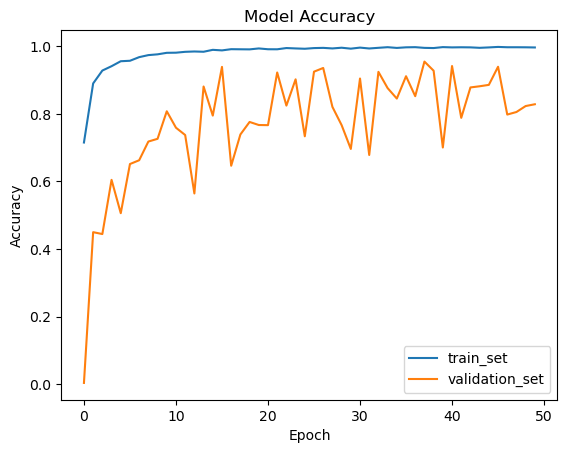

In [749]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_set', 'validation_set'], loc='lower right')
plt.show()

As said previously, these lines of code are crucial for evaluating the performance and training progress of the model. Monitoring the training and validation loss helps in understanding how well the model is learning from the data. A decreasing training lloss with a corresponding decreasing validation loss will indicate that the model is learning and generalizing well.

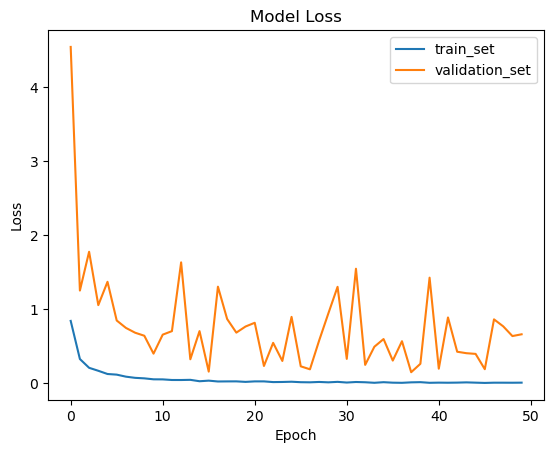

In [750]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_set', 'validation_set'], loc='upper right')
plt.show()

This line of code evaluates the trained model's performance using the test dataset.
This evaluation step is crucial to assess how well the model generalizes to new, unseen data and to understand its overall performance metrics.

In [742]:
loss, acc = model.evaluate(x_test_resampled, y_test, verbose=1)

 1/63 [..............................] - ETA: 2s - loss: 1.5878 - accuracy: 0.7500

63/63 [==============================] - 1s 23ms/step - loss: 1.6662 - accuracy: 0.7409


These lines of code use the model to predict the class of an image (this image was taken randomly, other images could have been taken).

600 450


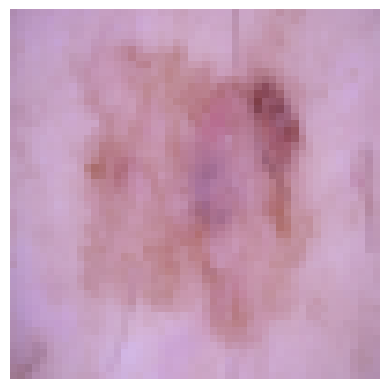

1/1 [==============================] - 0s 190ms/step
[4.0145733e-05 5.3586327e-06 9.7838360e-01 2.6183172e-06 2.1536769e-02
 1.6870717e-05 1.4693096e-05]
('bkl', 'benign keratosis-like lesions')


In [743]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

image = PIL.Image.open('../archive/HAM10000_images_part_1/ISIC_0024312.jpg')
largeur, hauteur = image.size
print(largeur, hauteur)
image = image.resize((50, 50))

img = np.array(image)

plt.imshow(img)
plt.axis('off')
plt.show()

img = np.array(image).reshape(-1, 50, 50, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])

It is now necessary to undertsand why some images were not correctly classified. The following lines of ocde iterate through a certain number of images. These images are then passed to the model for correct classification. If an image is not correctly classified, the code prints the image and the class to which the image should have been classified. This analysis will help understand why these misclassified images are found in the wrong class.

1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024306.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024307.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024308.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024309.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024310.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024311.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024312.jpg: Classe prédite = bkl, Classe réelle =

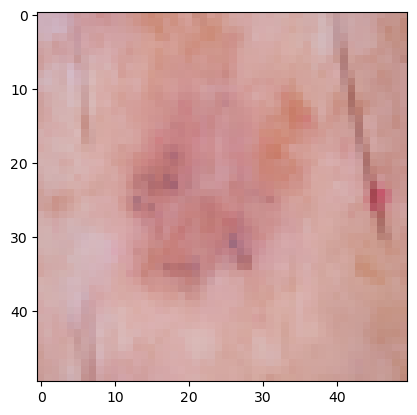

1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024332.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024333.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024334.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024335.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024336.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024337.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024338.jpg: Classe prédite = bkl, Classe ré

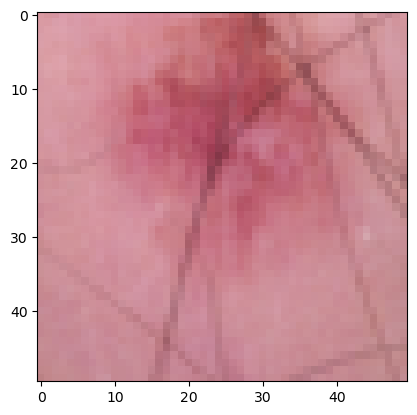

1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0024343.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024344.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction incorrecte pour l'image ISIC_0024345.jpg: Classe prédite = nv, Classe réelle = bcc


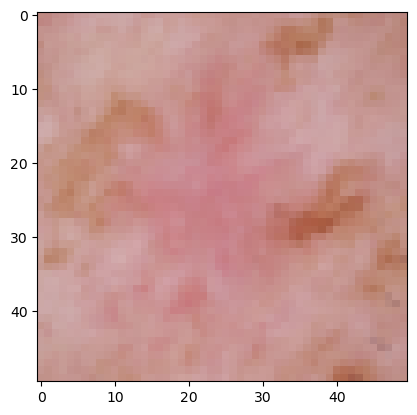

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024346.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024347.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024348.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024349.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 12ms/step
Prédiction correcte pour l'image ISIC_0024350.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024351.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024352.jpg: Classe prédite = nv, Classe réelle = 

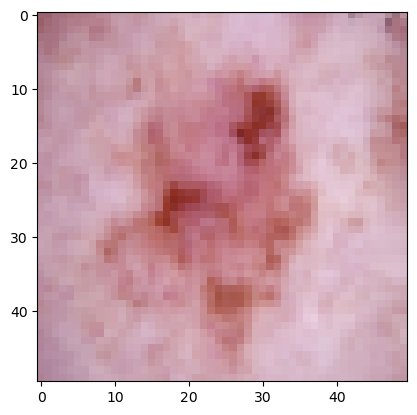

1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024373.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024374.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024375.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024376.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024377.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024378.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024379.jpg: Classe prédite = nv, Classe réelle 

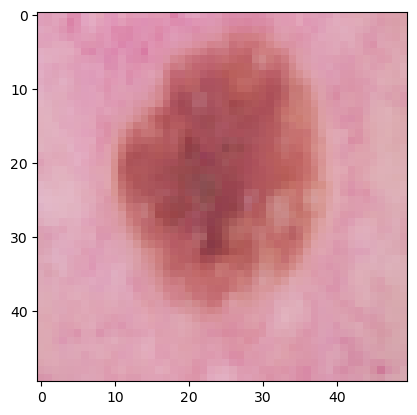

1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024384.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024385.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024386.jpg: Classe prédite = df, Classe réelle = df
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024387.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024388.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024389.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024390.jpg: Classe prédite = nv, Classe réelle = nv

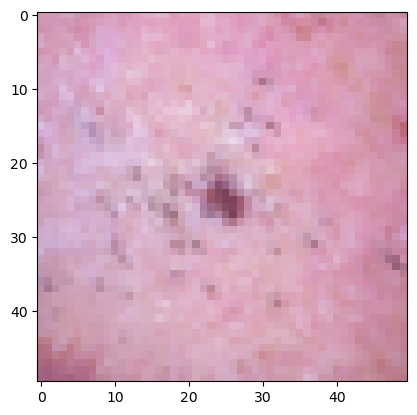

1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024412.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024413.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024414.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024415.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024416.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024417.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024418.jpg: Classe prédite = akiec, Classe réelle

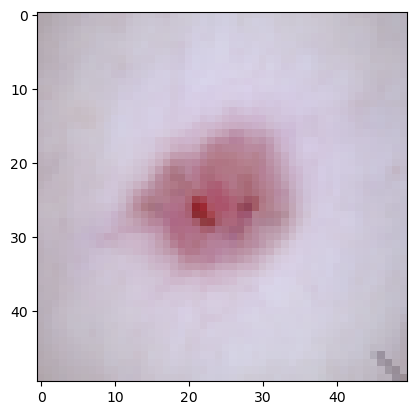

1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024437.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024438.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024439.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024440.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024441.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024442.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024443.jpg: Classe prédite = bcc, Classe réelle = b

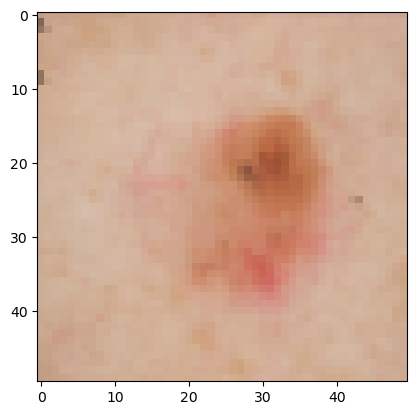

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024453.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024454.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024455.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024456.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 29ms/step
Prédiction incorrecte pour l'image ISIC_0024457.jpg: Classe prédite = mel, Classe réelle = bcc


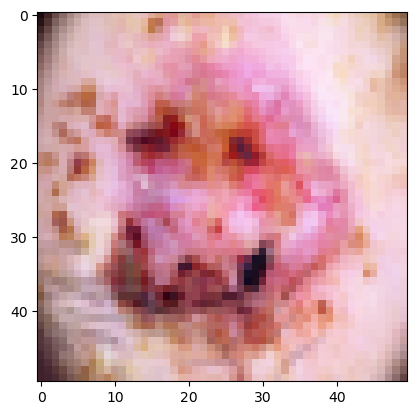

1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024458.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024459.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024460.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024461.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024462.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction incorrecte pour l'image ISIC_0024463.jpg: Classe prédite = bkl, Classe réelle = akiec


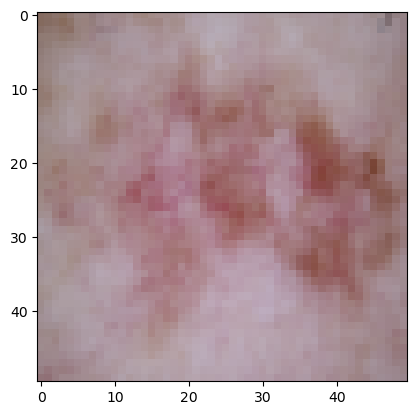

1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024464.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024465.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024466.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024467.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024468.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024469.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024470.jpg: Classe prédite = akiec, Classe ré

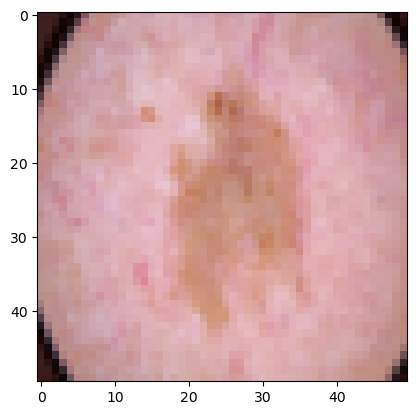

1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024499.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024500.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024501.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024502.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024503.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024504.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024505.jpg: Classe prédite = bkl, Classe réelle =

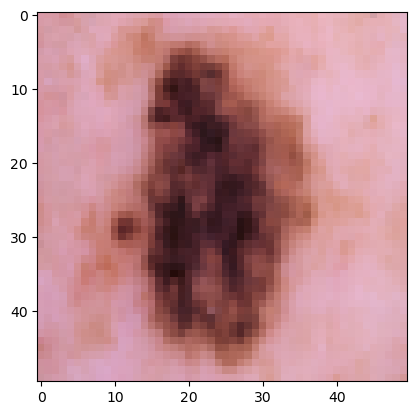

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024519.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024520.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024521.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0024522.jpg: Classe prédite = bkl, Classe réelle = akiec


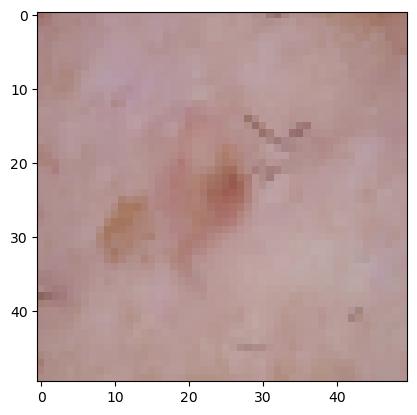

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024523.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024524.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction incorrecte pour l'image ISIC_0024525.jpg: Classe prédite = nv, Classe réelle = mel


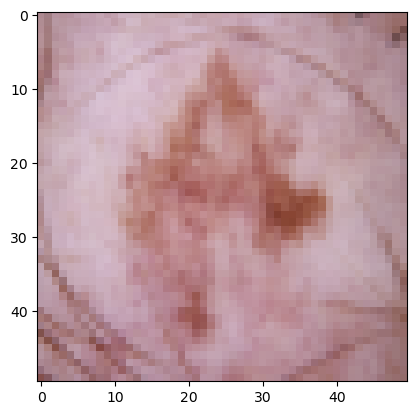

1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024526.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024527.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024528.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024529.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024530.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 36ms/step
Prédiction correcte pour l'image ISIC_0024531.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024532.jpg: Classe prédite = nv, Classe réelle = nv

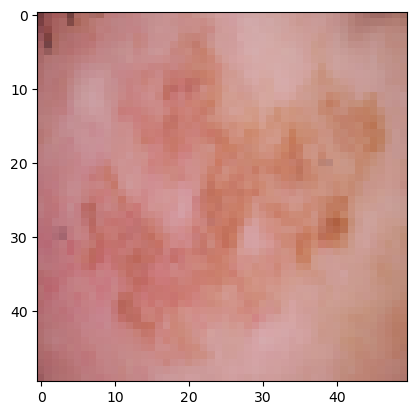

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024555.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024556.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024557.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024558.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024559.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024560.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024561.jpg: Classe prédite = nv, Classe réelle = nv

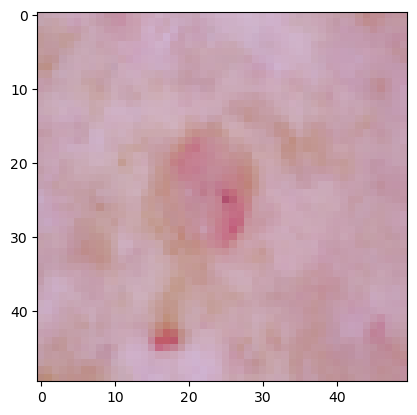

1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024573.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024574.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024575.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024576.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024577.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024578.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024579.jpg: Classe prédite = akiec, Classe 

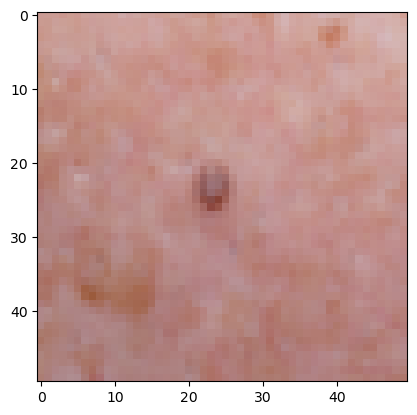

1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024605.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024606.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024607.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024608.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024609.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024610.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024611.jpg: Classe prédite = nv, Classe réelle = nv

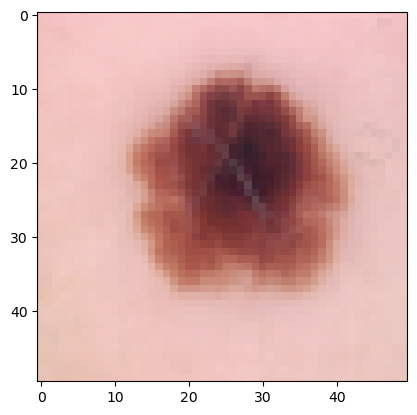

1/1 [==============================] - 0s 30ms/step
Prédiction incorrecte pour l'image ISIC_0024646.jpg: Classe prédite = bcc, Classe réelle = akiec


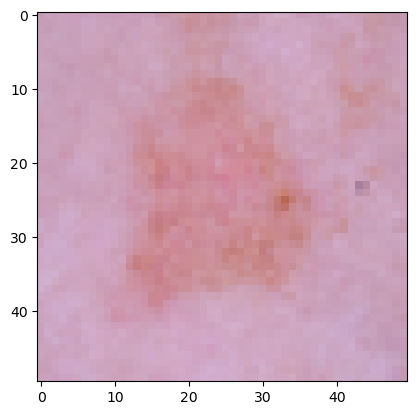

1/1 [==============================] - 0s 83ms/step
Prédiction incorrecte pour l'image ISIC_0024647.jpg: Classe prédite = bkl, Classe réelle = mel


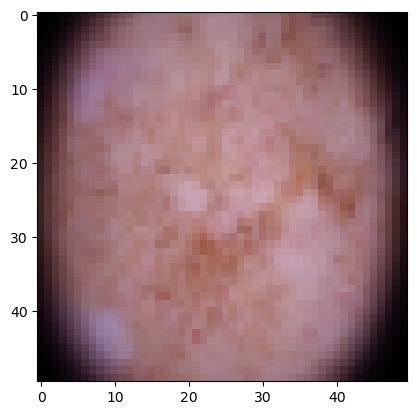

1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024648.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024649.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0024650.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024651.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024652.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024653.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024654.jpg: Classe prédite = akiec, Classe réelle

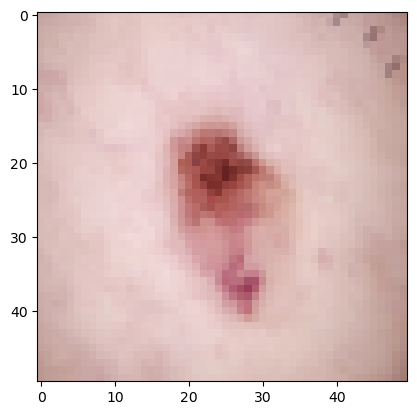

1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024666.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024667.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024668.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024669.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024670.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024671.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024672.jpg: Classe prédite = bkl, Classe réel

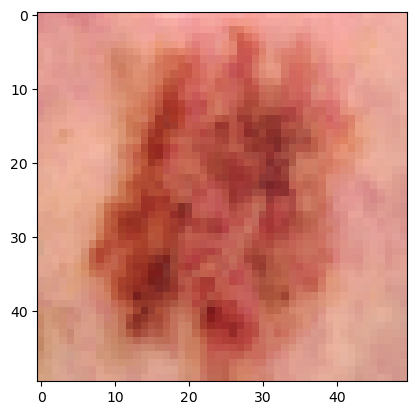

1/1 [==============================] - 0s 40ms/step
Prédiction correcte pour l'image ISIC_0024701.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024702.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024703.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024704.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024705.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024706.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024707.jpg: Classe prédite = akiec, Class

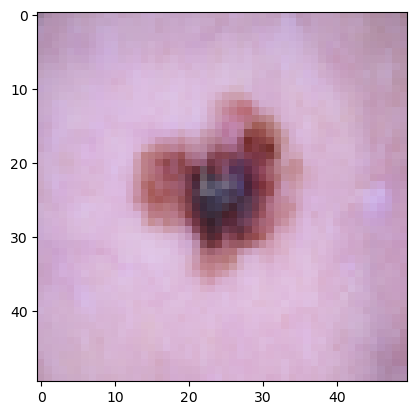

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024730.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024731.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024732.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024733.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024734.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024735.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024736.jpg: Classe prédite = nv, Classe réelle 

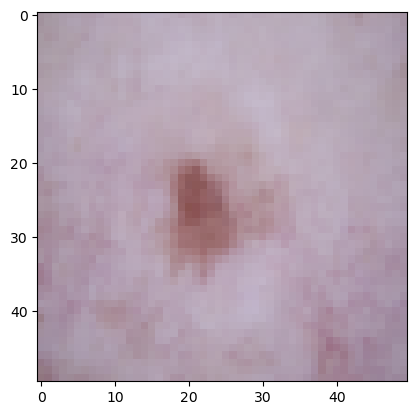

1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024741.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024742.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024743.jpg: Classe prédite = bcc, Classe réelle = bcc
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024744.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024745.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024746.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0024747.jpg: Classe prédite = vasc, Classe réell

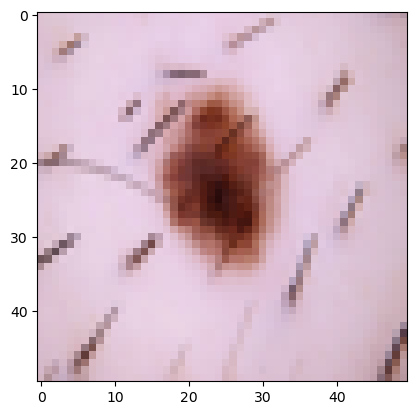

1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024749.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024750.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024751.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024752.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024753.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024754.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024755.jpg: Classe prédite = nv, Classe réelle = nv

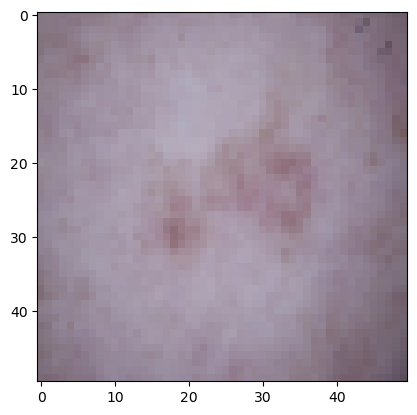

1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024762.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024763.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024764.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0024765.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0024766.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024767.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024768.jpg: Classe prédite = nv, Classe rée

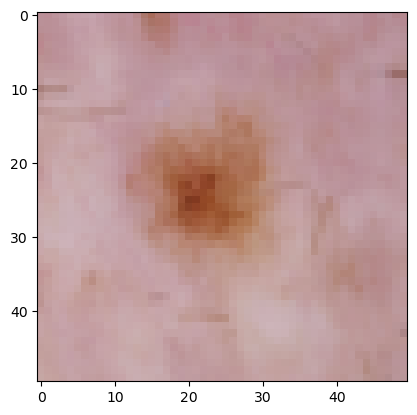

1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024773.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024774.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024775.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024776.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024777.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024778.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024779.jpg: Classe prédite = nv, Classe réelle 

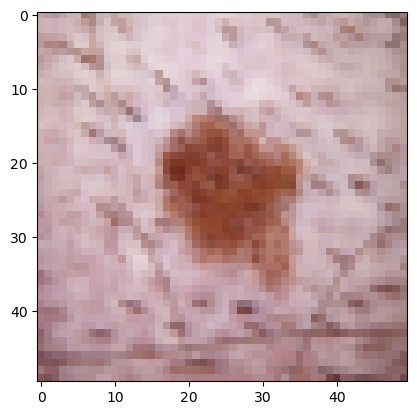

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024840.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024841.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024842.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024843.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024844.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024845.jpg: Classe prédite = df, Classe réelle = df
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0024846.jpg: Classe prédite = nv, Classe réell

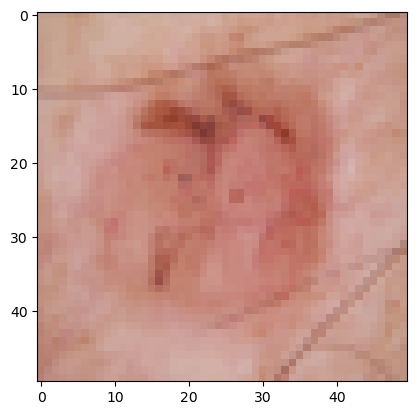

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024849.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024850.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024851.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0024852.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0024853.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0024854.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024855.jpg: Classe prédite = nv, Classe réell

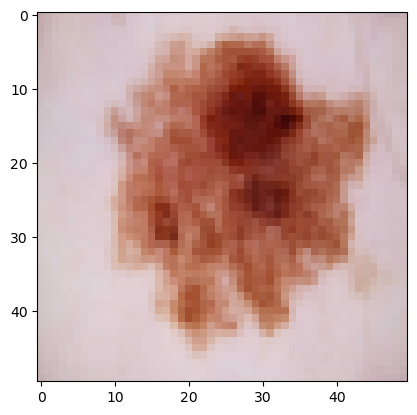

1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024865.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 11ms/step
Prédiction correcte pour l'image ISIC_0024866.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024867.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024868.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024869.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024870.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024871.jpg: Classe prédite = bkl, Classe réel

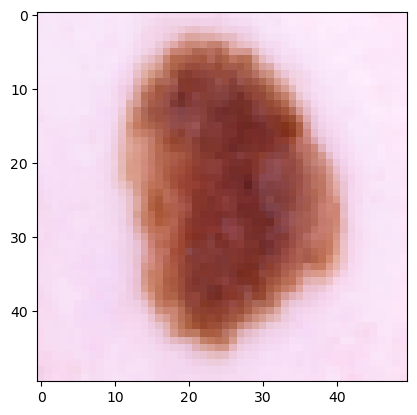

1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0024899.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024900.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024901.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024902.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0024903.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024904.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024905.jpg: Classe prédite = nv, Classe réell

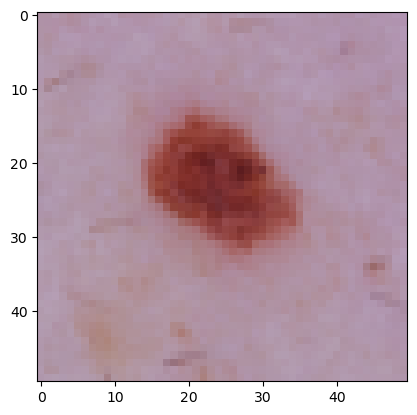

1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024919.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024920.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024921.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024922.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024923.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024924.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction incorrecte pour l'image ISIC_0024925.jpg: Classe prédite = bcc, Classe ré

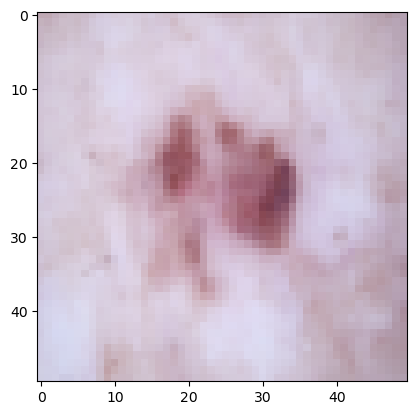

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024926.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024927.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024928.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024929.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024930.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 23ms/step
Prédiction incorrecte pour l'image ISIC_0024931.jpg: Classe prédite = nv, Classe réelle = bcc


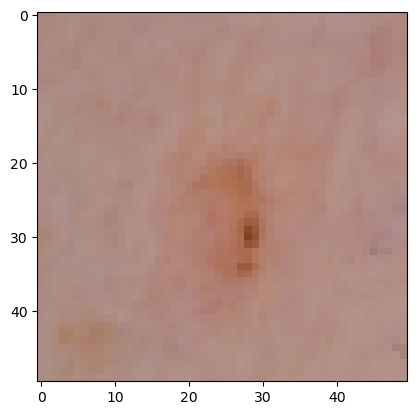

1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024932.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 32ms/step
Prédiction correcte pour l'image ISIC_0024933.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0024934.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction incorrecte pour l'image ISIC_0024935.jpg: Classe prédite = bcc, Classe réelle = nv


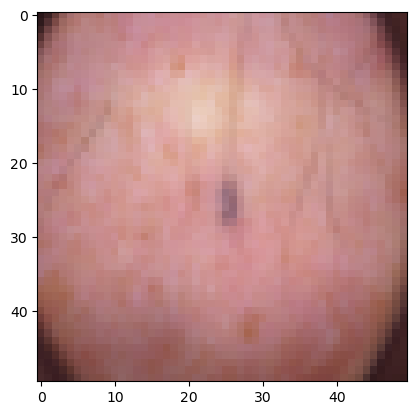

1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024936.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0024937.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024938.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024939.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024940.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024941.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024942.jpg: Classe prédite = nv, Classe réelle = 

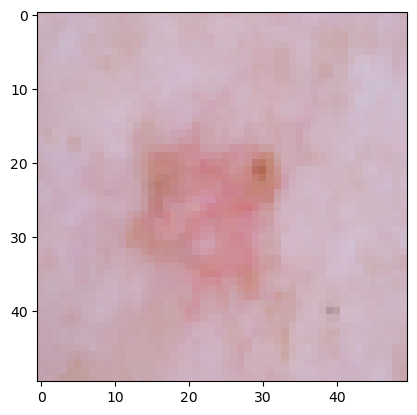

1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024947.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 31ms/step
Prédiction incorrecte pour l'image ISIC_0024948.jpg: Classe prédite = bcc, Classe réelle = akiec


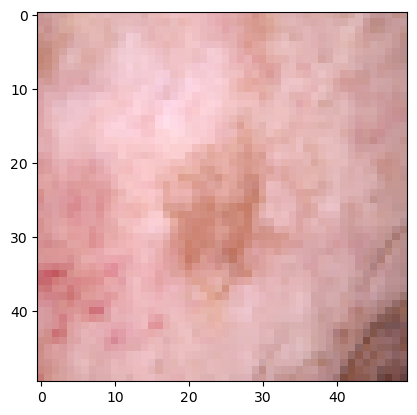

1/1 [==============================] - 0s 25ms/step
Prédiction incorrecte pour l'image ISIC_0024949.jpg: Classe prédite = nv, Classe réelle = bcc


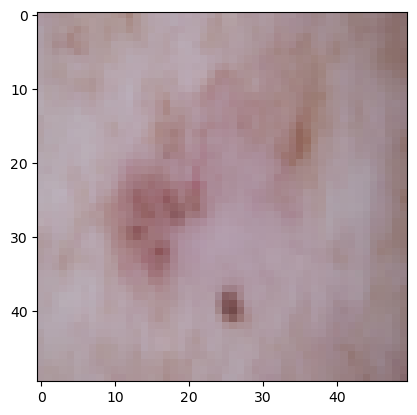

1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024950.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0024951.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024952.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0024953.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024954.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0024955.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024956.jpg: Classe prédite = nv, Classe réelle 

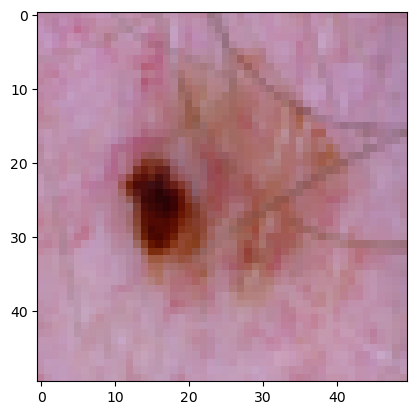

1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0024988.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0024989.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 26ms/step
Prédiction correcte pour l'image ISIC_0024990.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 35ms/step
Prédiction correcte pour l'image ISIC_0024991.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 30ms/step
Prédiction correcte pour l'image ISIC_0024992.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0024993.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 34ms/step
Prédiction correcte pour l'image ISIC_0024994.jpg: Classe prédite = df, Classe réelle = df

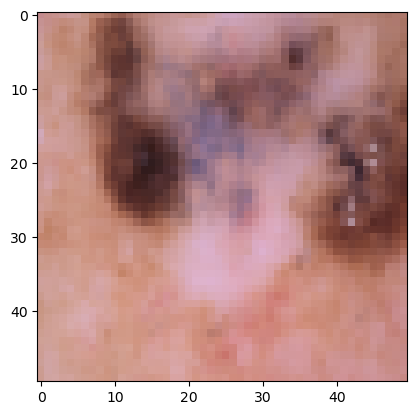

1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0025000.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025001.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0025002.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0025003.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 29ms/step
Prédiction correcte pour l'image ISIC_0025004.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 16ms/step
Prédiction correcte pour l'image ISIC_0025005.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0025006.jpg: Classe prédite = nv, Classe réelle = 

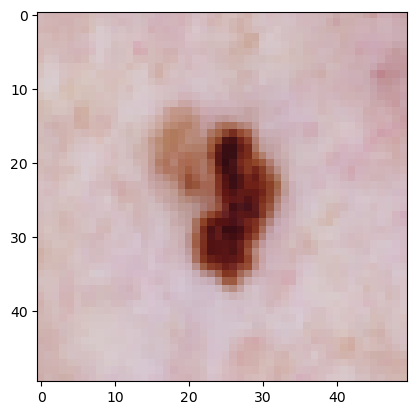

1/1 [==============================] - 0s 25ms/step
Prédiction correcte pour l'image ISIC_0025036.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 22ms/step
Prédiction correcte pour l'image ISIC_0025037.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025038.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 27ms/step
Prédiction correcte pour l'image ISIC_0025039.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025040.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025041.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0025042.jpg: Classe prédite = nv, Classe réelle 

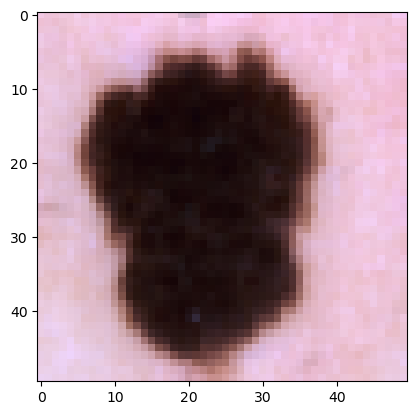

1/1 [==============================] - 0s 14ms/step
Prédiction correcte pour l'image ISIC_0025048.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025049.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0025050.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 19ms/step
Prédiction correcte pour l'image ISIC_0025051.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025052.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 21ms/step
Prédiction correcte pour l'image ISIC_0025053.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025054.jpg: Classe prédite = nv, Classe réelle = nv

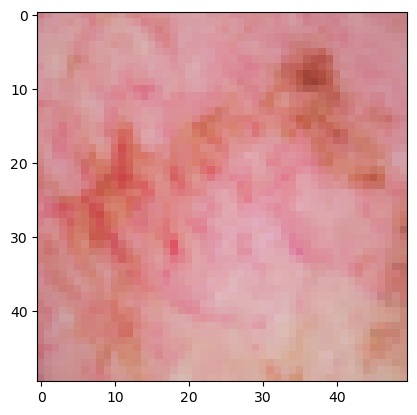

1/1 [==============================] - 0s 23ms/step
Prédiction correcte pour l'image ISIC_0025069.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 24ms/step
Prédiction correcte pour l'image ISIC_0025070.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 31ms/step
Prédiction correcte pour l'image ISIC_0025071.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 28ms/step
Prédiction correcte pour l'image ISIC_0025072.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025073.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 18ms/step
Prédiction correcte pour l'image ISIC_0025074.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0025075.jpg: Classe prédite = bkl, Classe réel

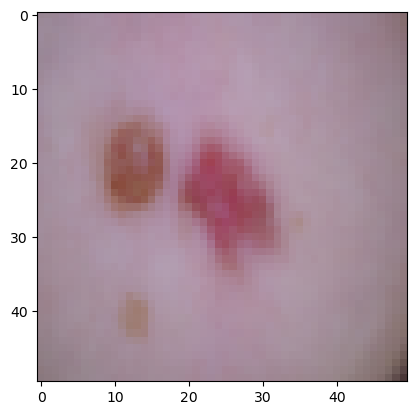

1/1 [==============================] - 0s 33ms/step
Prédiction correcte pour l'image ISIC_0025082.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 20ms/step
Prédiction correcte pour l'image ISIC_0025083.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 17ms/step
Prédiction correcte pour l'image ISIC_0025084.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 15ms/step
Prédiction correcte pour l'image ISIC_0025085.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 17ms/step
Prédiction incorrecte pour l'image ISIC_0025086.jpg: Classe prédite = mel, Classe réelle = bkl


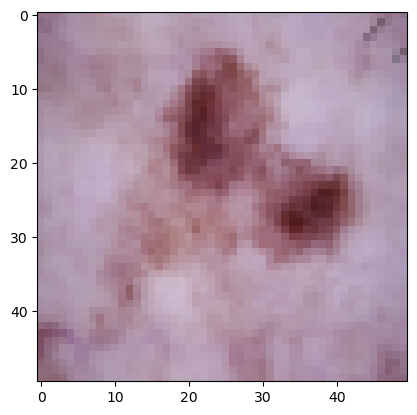

1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0025087.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 71ms/step
Prédiction correcte pour l'image ISIC_0025088.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025089.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 70ms/step
Prédiction correcte pour l'image ISIC_0025090.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 73ms/step
Prédiction correcte pour l'image ISIC_0025091.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 69ms/step
Prédiction correcte pour l'image ISIC_0025092.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 77ms/step
Prédiction correcte pour l'image ISIC_0025093.jpg: Classe prédite = nv, Classe réell

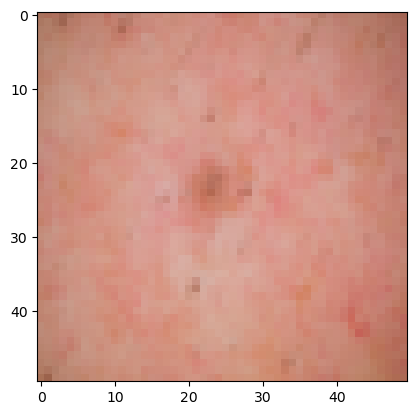

1/1 [==============================] - 0s 73ms/step
Prédiction correcte pour l'image ISIC_0025113.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0025114.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 65ms/step
Prédiction correcte pour l'image ISIC_0025115.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 70ms/step
Prédiction correcte pour l'image ISIC_0025116.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0025117.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 66ms/step
Prédiction correcte pour l'image ISIC_0025118.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 69ms/step
Prédiction correcte pour l'image ISIC_0025119.jpg: Classe prédite = nv, Classe réelle = 

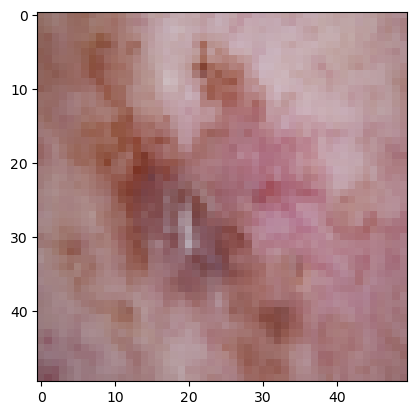

1/1 [==============================] - 0s 76ms/step
Prédiction correcte pour l'image ISIC_0025131.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 72ms/step
Prédiction correcte pour l'image ISIC_0025132.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 79ms/step
Prédiction incorrecte pour l'image ISIC_0025133.jpg: Classe prédite = mel, Classe réelle = nv


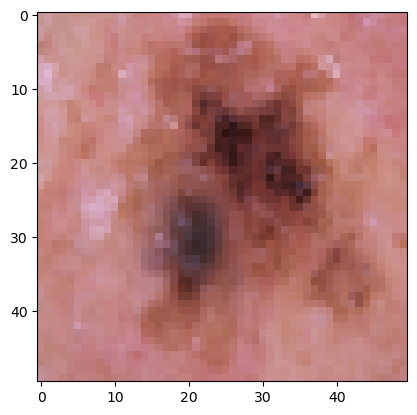

1/1 [==============================] - 0s 78ms/step
Prédiction correcte pour l'image ISIC_0025134.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0025135.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0025136.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 59ms/step
Prédiction correcte pour l'image ISIC_0025137.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0025138.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0025139.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 66ms/step
Prédiction correcte pour l'image ISIC_0025140.jpg: Classe prédite = bkl, Classe réelle =

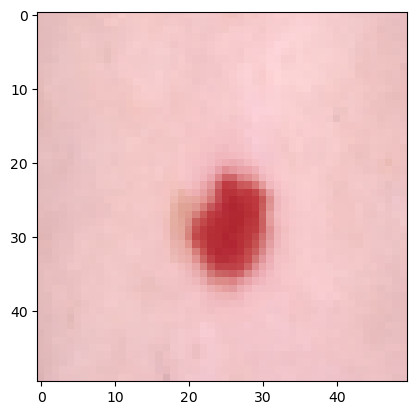

1/1 [==============================] - 0s 64ms/step
Prédiction correcte pour l'image ISIC_0025198.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0025199.jpg: Classe prédite = bkl, Classe réelle = bkl
1/1 [==============================] - 0s 69ms/step
Prédiction correcte pour l'image ISIC_0025200.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 66ms/step
Prédiction correcte pour l'image ISIC_0025201.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 63ms/step
Prédiction correcte pour l'image ISIC_0025202.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 66ms/step
Prédiction correcte pour l'image ISIC_0025203.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025204.jpg: Classe prédite = nv, Classe réelle = 

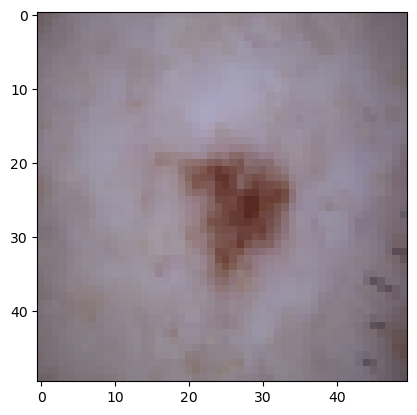

1/1 [==============================] - 0s 48ms/step
Prédiction correcte pour l'image ISIC_0025244.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 46ms/step
Prédiction correcte pour l'image ISIC_0025245.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 72ms/step
Prédiction correcte pour l'image ISIC_0025246.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 47ms/step
Prédiction correcte pour l'image ISIC_0025247.jpg: Classe prédite = akiec, Classe réelle = akiec
1/1 [==============================] - 0s 60ms/step
Prédiction correcte pour l'image ISIC_0025248.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 70ms/step
Prédiction correcte pour l'image ISIC_0025249.jpg: Classe prédite = vasc, Classe réelle = vasc
1/1 [==============================] - 0s 59ms/step
Prédiction incorrecte pour l'image ISIC_0025250.jpg: Classe prédite = mel,

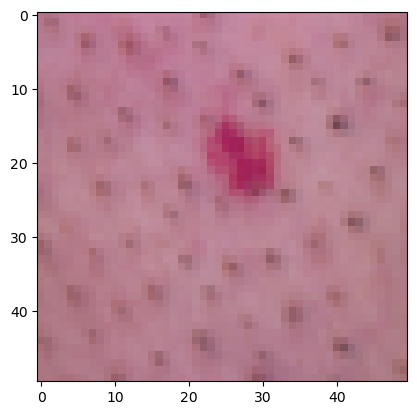

1/1 [==============================] - 0s 67ms/step
Prédiction correcte pour l'image ISIC_0025251.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 70ms/step
Prédiction correcte pour l'image ISIC_0025252.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 80ms/step
Prédiction correcte pour l'image ISIC_0025253.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 79ms/step
Prédiction correcte pour l'image ISIC_0025254.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 43ms/step
Prédiction correcte pour l'image ISIC_0025255.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 41ms/step
Prédiction correcte pour l'image ISIC_0025256.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 62ms/step
Prédiction correcte pour l'image ISIC_0025257.jpg: Classe prédite = nv, Classe réelle = nv

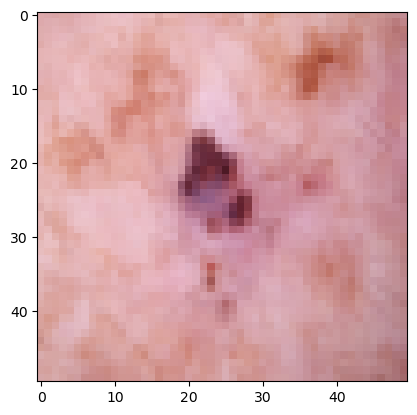

1/1 [==============================] - 0s 68ms/step
Prédiction correcte pour l'image ISIC_0025267.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 73ms/step
Prédiction correcte pour l'image ISIC_0025268.jpg: Classe prédite = mel, Classe réelle = mel
1/1 [==============================] - 0s 74ms/step
Prédiction correcte pour l'image ISIC_0025269.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 71ms/step
Prédiction correcte pour l'image ISIC_0025270.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 65ms/step
Prédiction correcte pour l'image ISIC_0025271.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 71ms/step
Prédiction correcte pour l'image ISIC_0025272.jpg: Classe prédite = nv, Classe réelle = nv
1/1 [==============================] - 0s 65ms/step
Prédiction correcte pour l'image ISIC_0025273.jpg: Classe prédite = nv, Classe réelle = 

In [747]:
import os
import pandas as pd
from PIL import Image

dossier_images = '../archive/HAM10000_images_part_1/'
chemin_metadata ="../archive/HAM10000_metadata.csv"

fichier_sortie = open("predictions_incorrectes.txt", "w")

metadata = pd.read_csv(chemin_metadata)

for nom_image in os.listdir(dossier_images)[:1000]:
    chemin_image = os.path.join(dossier_images, nom_image)
    image = Image.open(chemin_image)
    image = image.resize((50, 50))
    img = np.array(image)
    img = np.array(image).reshape(-1, 50, 50, 3)

    prediction = model.predict(img)
    prediction = prediction.tolist()
    max_prob = max(prediction[0])
    class_ind = prediction[0].index(max_prob)

    nom_image_sans_extension = os.path.splitext(nom_image)[0]
    classe_reelle = metadata[metadata['image_id'] == nom_image_sans_extension]['dx'].values[0]
    
    nom_classe_predite = classes[class_ind][0]

    if nom_classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image {nom_image}: Classe prédite = {nom_classe_predite}, Classe réelle = {classe_reelle}")
    else:
        print(f"Prédiction incorrecte pour l'image {nom_image}: Classe prédite = {nom_classe_predite}, Classe réelle = {classe_reelle}")
        fichier_sortie.write(f"Prédiction incorrecte pour l'image {nom_image}: Classe prédite = {nom_classe_predite}, Classe réelle = {classe_reelle}\n")
        plt.imshow(image)
        plt.show()

fichier_sortie.close()

These lines of code help in assessing the model's classification performance by providing insights into how well it predicts each class and where it might be making errors. The confusion matrix visualization is crucial for understanding the model's strengths and weaknesses across different classes, aiding in further analysis.

63/63 [==============================] - 1s 20ms/step


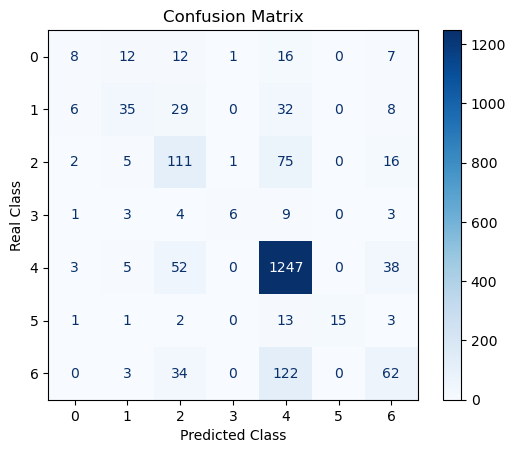

In [786]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(x_test_resampled)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.title("Confusion Matrix")
plt.show()
